In [13]:
import numpy as np
import matplotlib.pyplot as plt

class AdalineSGD:
    
    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, Y):
        
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            if self.shuffle:
                X, Y = self._shuffle(X, Y)
            cost = []
            
            for xi, target in zip(X, Y):
                cost.append(self._update_weights(xi, target)) 
            
            avg_cost = sum(cost) / len(Y)
            self.cost_.append(avg_cost)
        return self
    
    def paritial_fit(self, X, Y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, Y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, Y)
        
        return self
            
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def _update_weights(self, xi, target):
        net_input = self.net_input(xi)
        output = self.activation(net_input)
        error = target - output
        self.w_[1:] += self.eta * np.dot(xi, error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    
    def _shuffle(self, X, Y):
        r = self.rgen.permutation(len(Y))
        return X[r], Y[r]
    
    def _initialize_weights(self, m):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size = 1 + m)
        self.w_initialized = True
    
    

In [14]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

Y = df.iloc[:100, 4].values
Y = np.where(Y == 'Iris-setosa', -1, 1)
X = df.iloc[:100, [0,2]].values
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:,0].mean()) / X[:,0].std()
X_std[:, 1] = (X[:, 1] - X[:,1].mean()) / X[:,1].std()

[-1  1]
('red', 'blue')


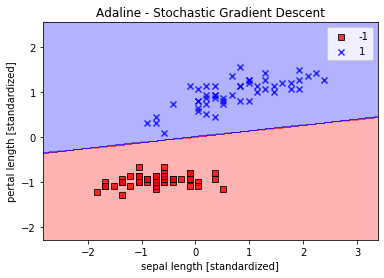

In [19]:
ada_std = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_std.fit(X_std, Y)

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')

    print(np.unique(y))
    print(colors[:len(np.unique(y))])

    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    X1_min, X1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    X2_min, X2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(X1_min, X1_max, resolution),
                              np.arange(X2_min, X2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0],
                   y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
        
plot_decision_regions(X_std, Y, classifier=ada_std)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('pertal length [standardized]')
plt.legend(loc='upper right')
# plt.tight_layout()
plt.show()

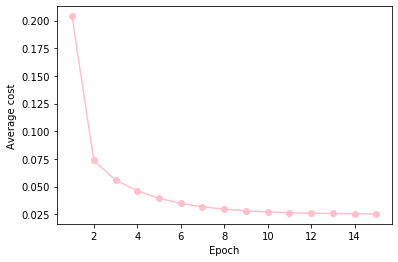

In [20]:
plt.plot(range(1, len(ada_std.cost_)+1), ada_std.cost_, color = 'pink', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Average cost')
plt.show()